In [1]:
setwd("~/WGS//SNPS//12_07/")

In [2]:
fst=read.table("slidingwindow", row.names=NULL, header=TRUE)

In [5]:
head(fst)

row.names,region,chr,midPos,Nsites
"(357,5271)(500,5499)(500,5500)",AAPE02055386,3000,4916,0.098678
"(857,5771)(1000,5999)(1000,6000)",AAPE02055386,3500,4916,0.097179
"(1357,6271)(1500,6499)(1500,6500)",AAPE02055386,4000,4916,0.097014
"(1857,6771)(2000,6999)(2000,7000)",AAPE02055386,4500,4916,0.096539
"(2357,7271)(2500,7499)(2500,7500)",AAPE02055386,5000,4916,0.095201
"(2836,7763)(3000,7999)(3000,8000)",AAPE02055386,5500,4929,0.094678


In [3]:
fst$row.names=NULL

In [7]:
head(fst)

region,chr,midPos,Nsites
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [4]:
colnames(fst)=c("Scaffold","midPos", "Nsites", "FST")

In [9]:
head(fst)

Scaffold,midPos,Nsites,FST
AAPE02055386,3000,4916,0.098678
AAPE02055386,3500,4916,0.097179
AAPE02055386,4000,4916,0.097014
AAPE02055386,4500,4916,0.096539
AAPE02055386,5000,4916,0.095201
AAPE02055386,5500,4929,0.094678


In [5]:
fst$ScaffoldNum=as.numeric(as.factor(fst$Scaffold))

In [11]:
nrow(fst)

[1] 3892511

In [12]:
tail(fst)

,Scaffold,midPos,Nsites,FST,ScaffoldNum
3892506,GL433172,11000,1130,0.123437,11652
3892507,GL433172,11500,630,0.154347,11652
3892508,GL433172,12000,130,0.128494,11652
3892509,GL433172,14500,289,0.043607,11652
3892510,GL433172,15000,780,0.116784,11652
3892511,GL433173,3000,2817,0.086459,11653


Try just plotting high FST values

In [6]:
fstHigh=fst[fst$FST>=0.17,]

In [7]:
HighScaf=unique(droplevels(fstHigh$Scaffold))

In [15]:
HighScaf

[1] AAPE02072785 GL429767     GL429779     GL429783     GL429799    
 [6] GL429873     GL430077     GL430134     GL430361     GL430434    
[11] GL430496     GL430810     GL430934     GL431379     GL432554    
[16] GL432816    
16 Levels: AAPE02072785 GL429767 GL429779 GL429783 GL429799 ... GL432816

In [8]:
fstHighScaf=fst[fst$Scaffold %in% HighScaf,]

In [17]:
nrow(fstHighScaf)

[1] 225439

In [9]:
HighScaf=as.vector(as.character(HighScaf))

In [10]:
require(ggplot2)

Loading required package: ggplot2


In [11]:
fstHighScaf$ScaffoldNum2=as.numeric(as.factor(fstHighScaf$ScaffoldNum))

In [21]:
head(fstHighScaf)

,Scaffold,midPos,Nsites,FST,ScaffoldNum,ScaffoldNum2
71763,AAPE02072785,3000,4851,0.159647,8246,1
71764,AAPE02072785,3500,4876,0.161420,8246,1
71765,AAPE02072785,4000,4869,0.160075,8246,1
71766,AAPE02072785,4500,4869,0.159282,8246,1
71767,AAPE02072785,5000,4869,0.165675,8246,1
71768,AAPE02072785,5500,4874,0.174047,8246,1


In [12]:
require(qqman)

Loading required package: qqman

For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



Warning message in manhattan(fstHighScaf, chr = "ScaffoldNum2", bp = "midPos", p = "FST", :
“No SNP column found. OK unless you're trying to highlight.”

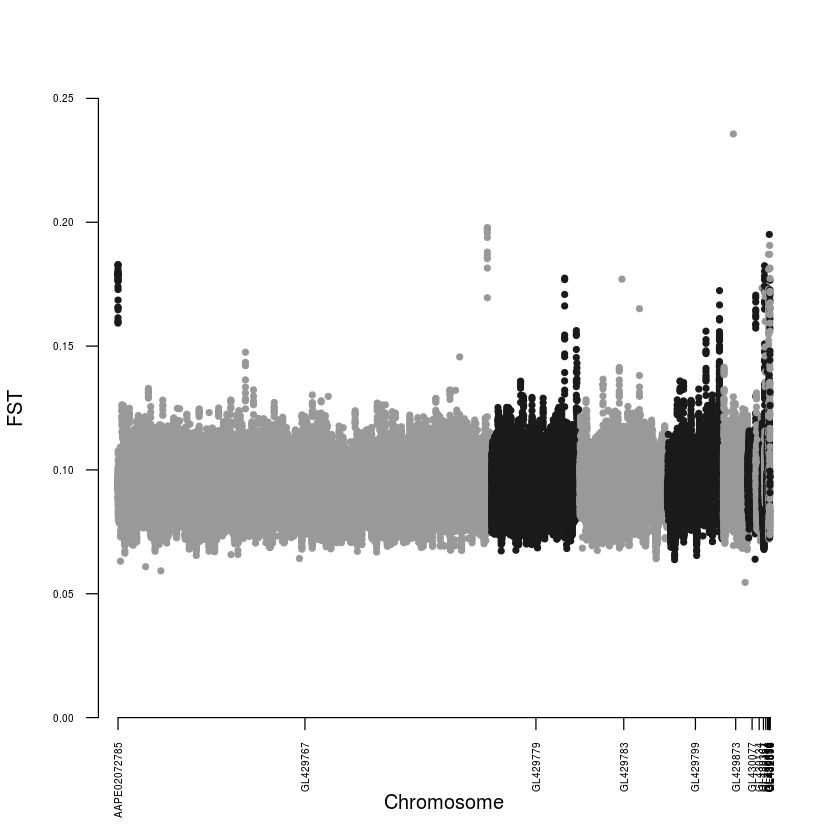

In [14]:
plot=manhattan(fstHighScaf, chr = "ScaffoldNum2", bp = "midPos", p = "FST", 
col = c("gray10", "gray60"), chrlabs = HighScaf, logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST")

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 1), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

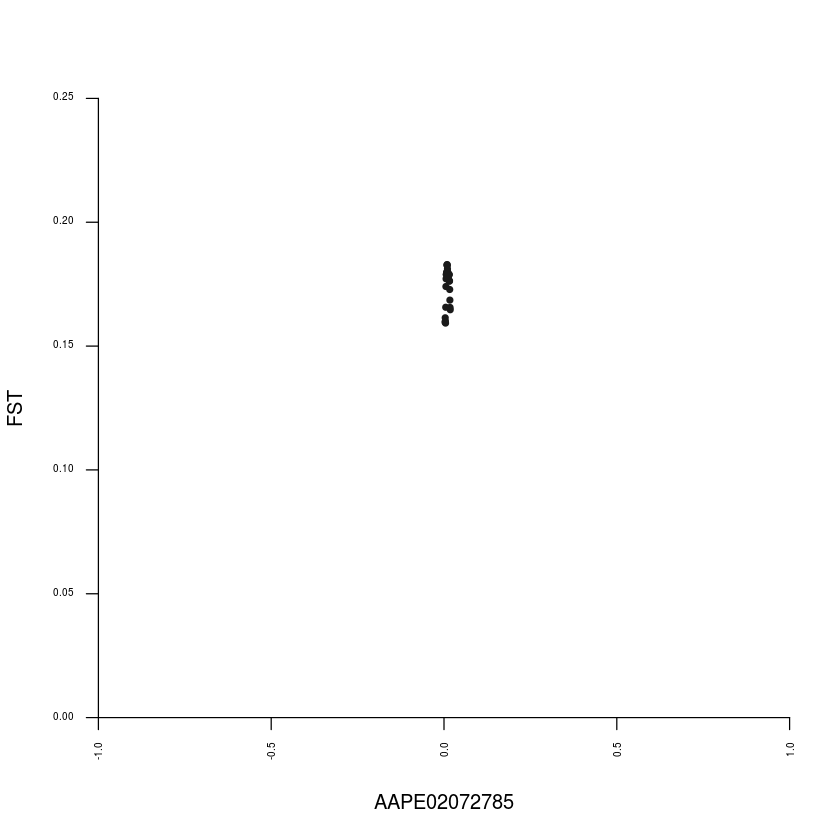

In [33]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==1), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[1])

This is the region that blasted as random homosapien clone. Doesn't seem to be very interesting. Plus the whole tiny scaffold is being selected for? could this be contamination that was in the reference genome? 

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 2), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

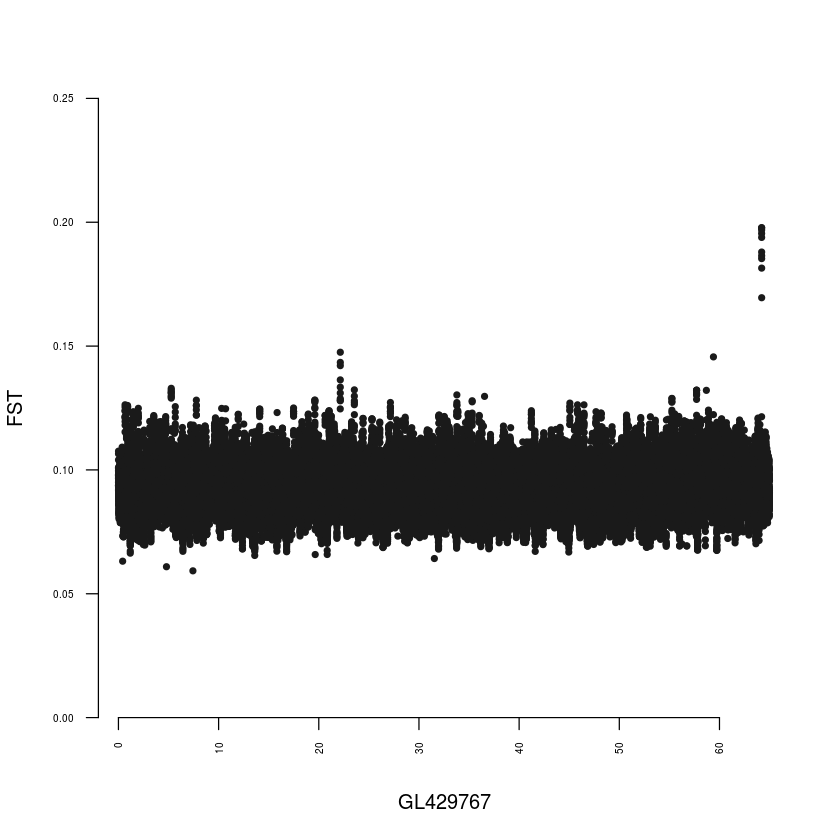

In [34]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==2), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[2])

This is the CNDD2 region, still looks the most clearly like an outlier I think. Well above 0.15

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 3), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

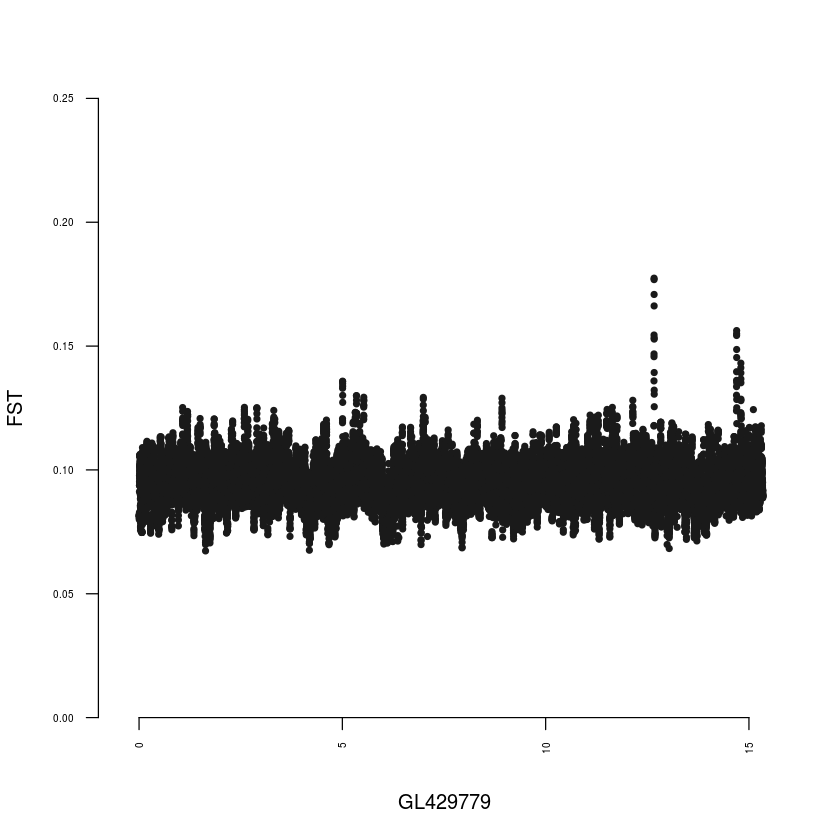

In [35]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==3), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[3])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 4), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

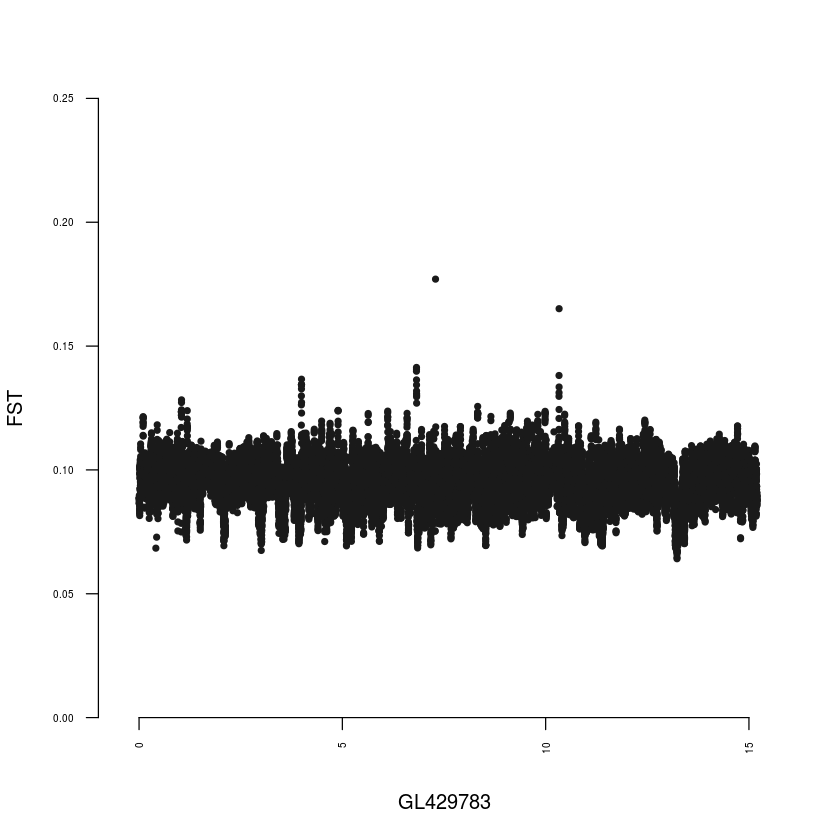

In [36]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==4), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[4])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 5), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

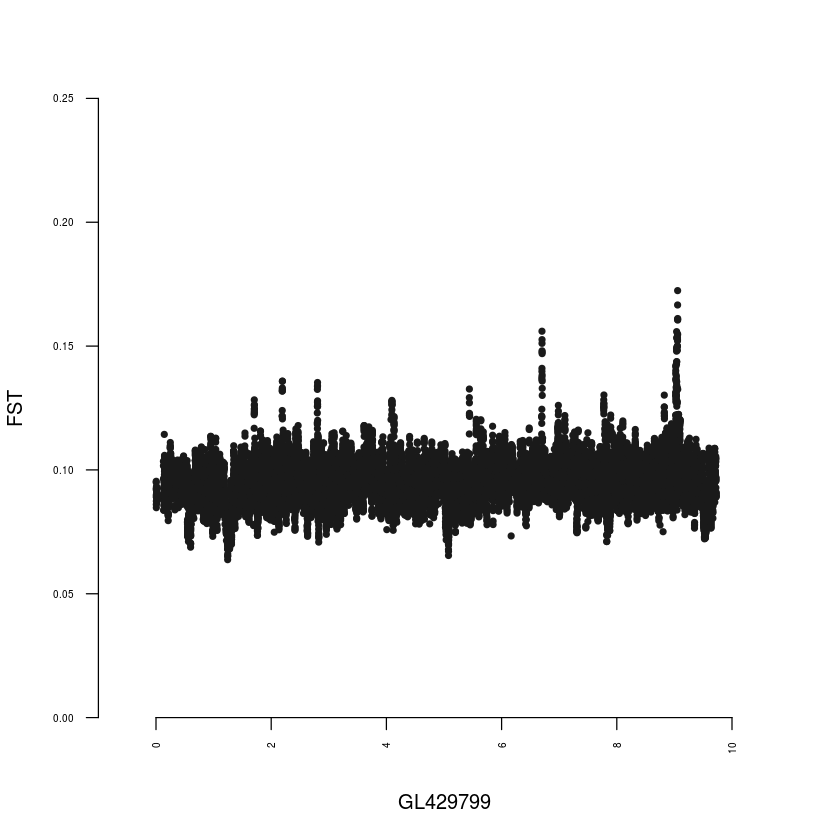

In [37]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==5), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[5])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 6), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

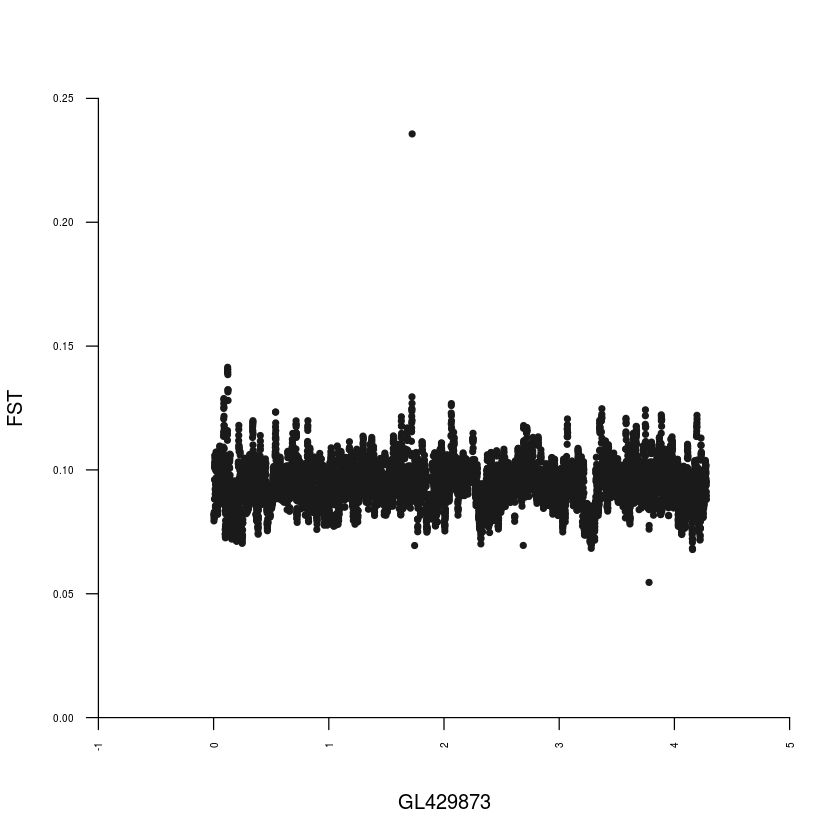

In [38]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==6), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[6])

Mitochondrial

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 7), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

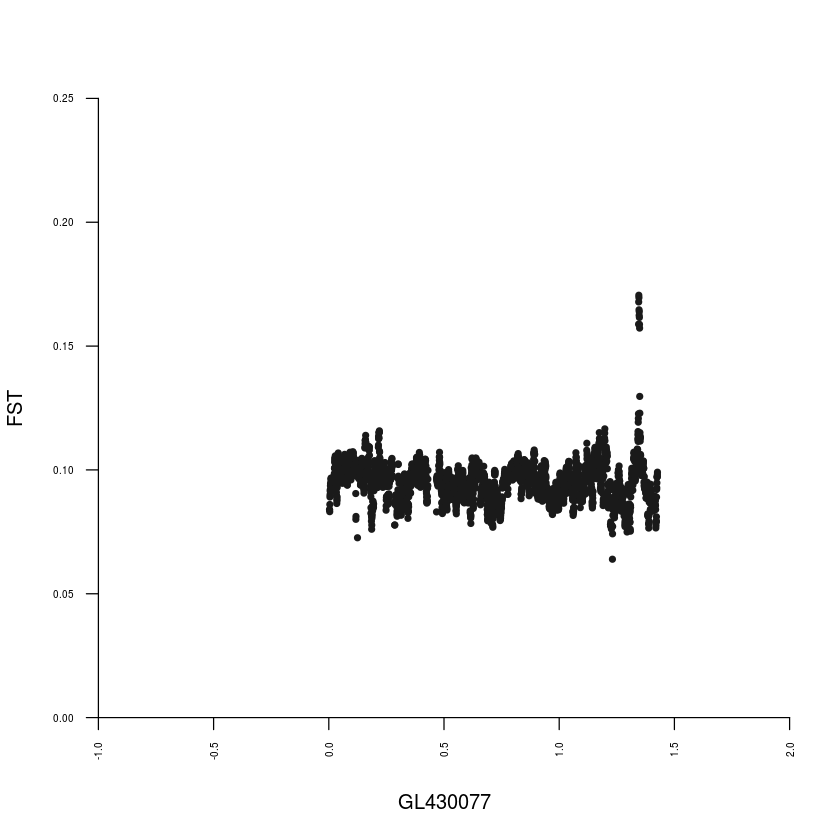

In [39]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==7), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[7])

This might be worth investigating. 

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 8), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

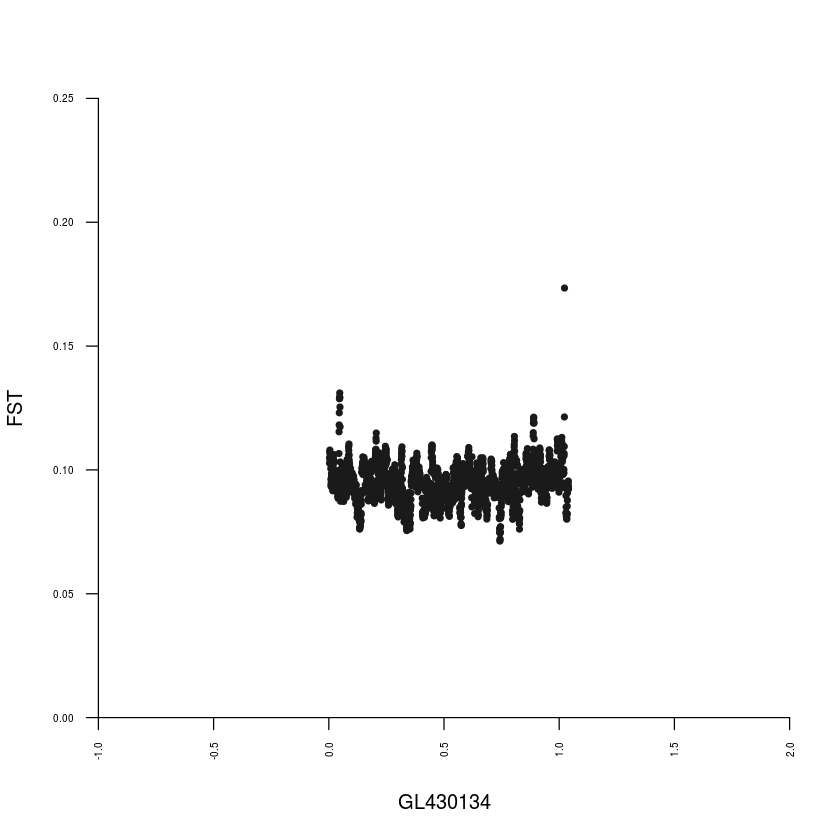

In [40]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==8), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[8])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 9), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

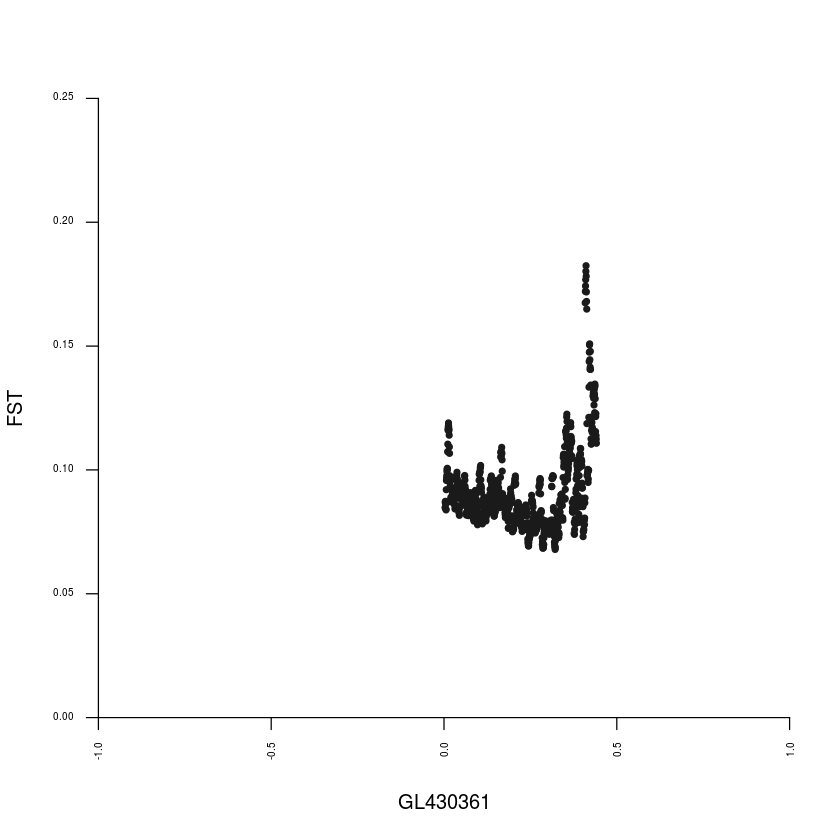

In [41]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==9), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[9])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 10), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

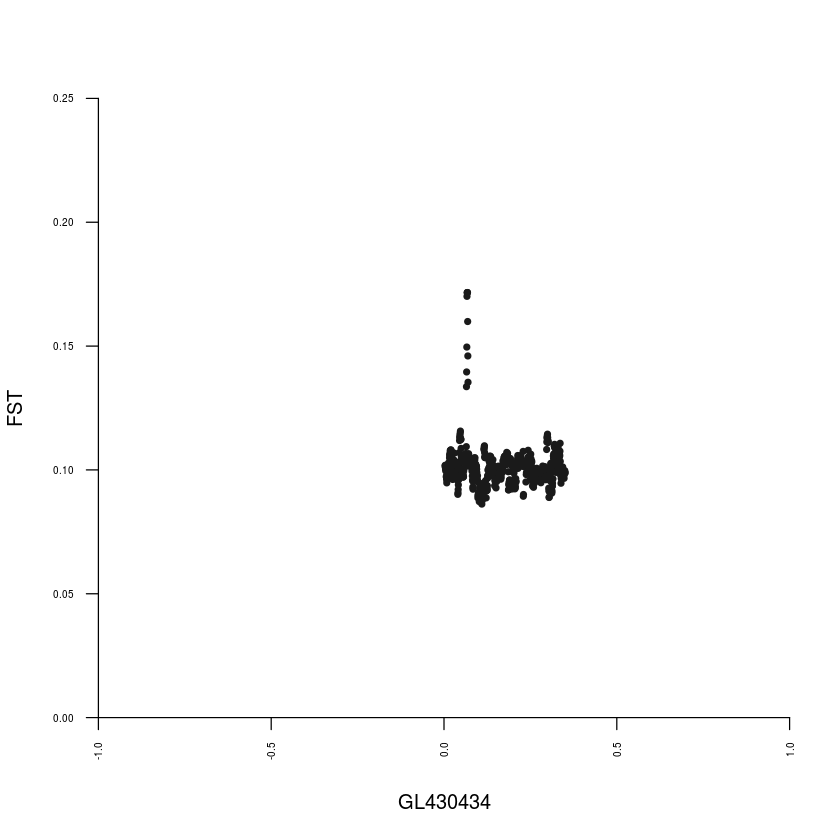

In [42]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==10), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[10])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 11), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

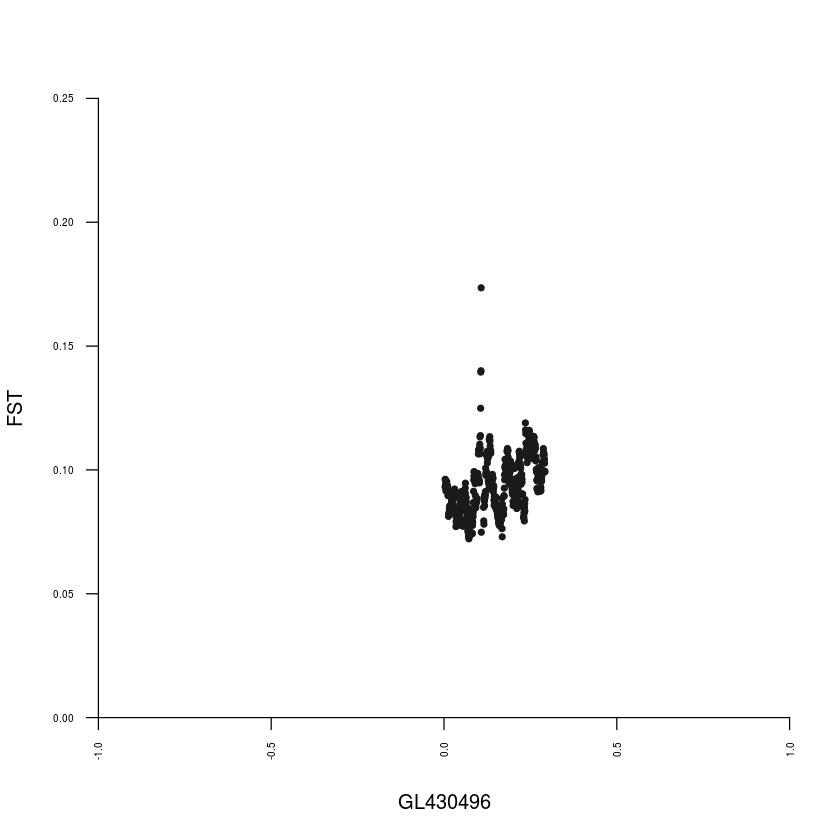

In [44]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==11), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[11])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 12), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

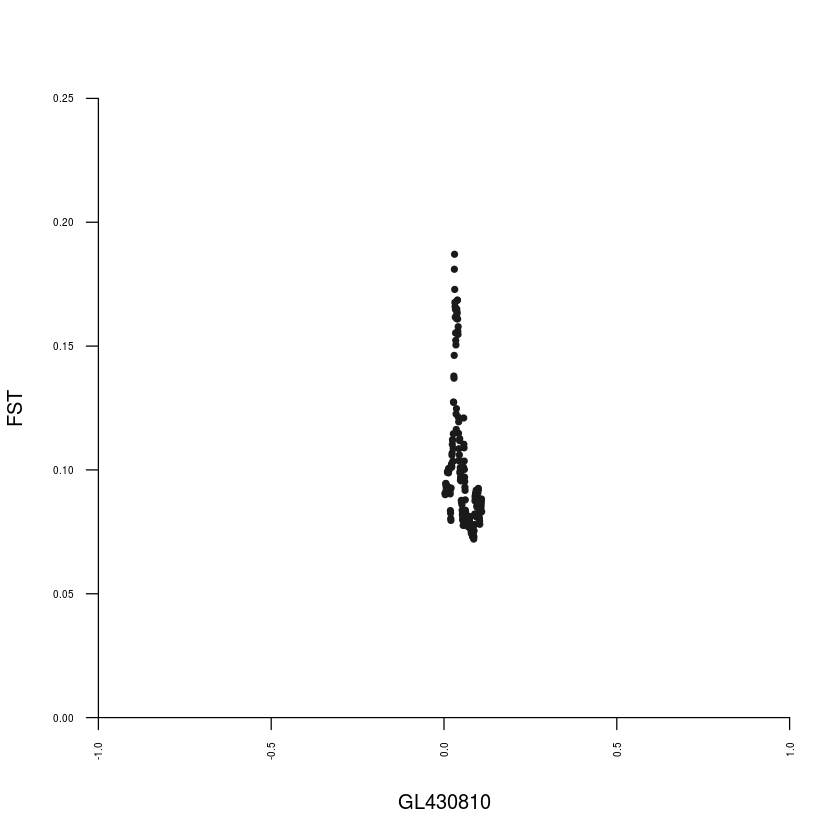

In [45]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==12), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[12])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 13), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

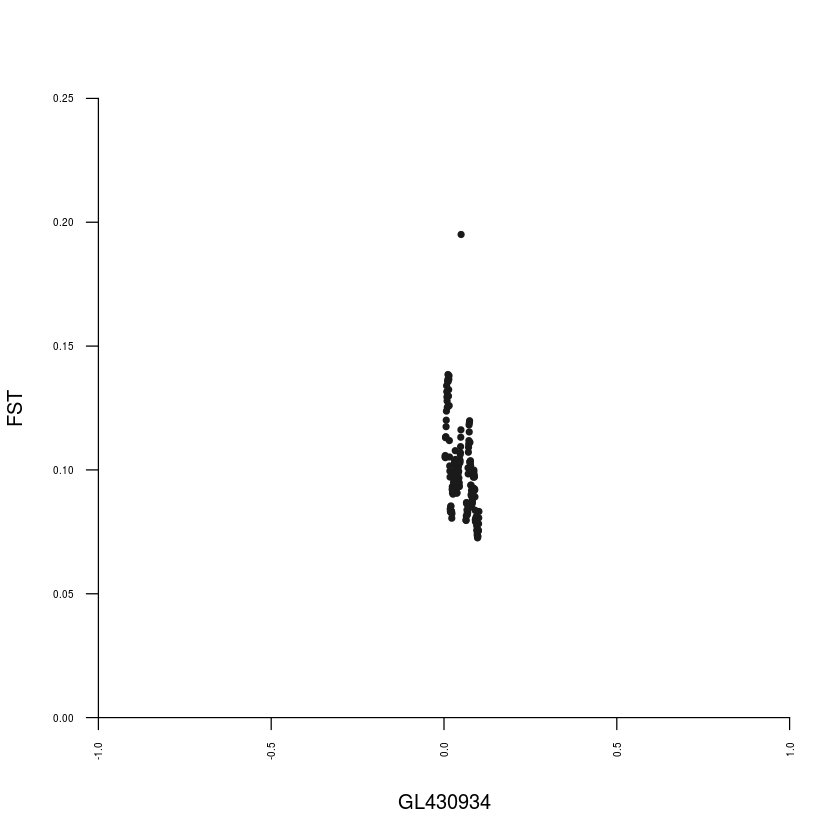

In [46]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==13), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[13])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 14), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

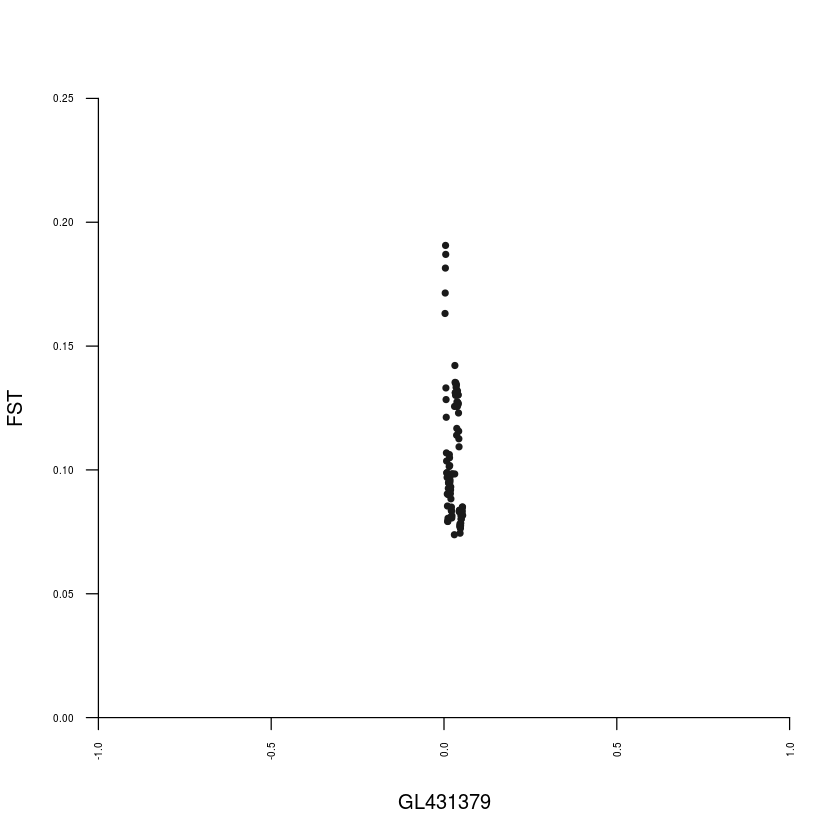

In [47]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==14), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[14])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 15), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

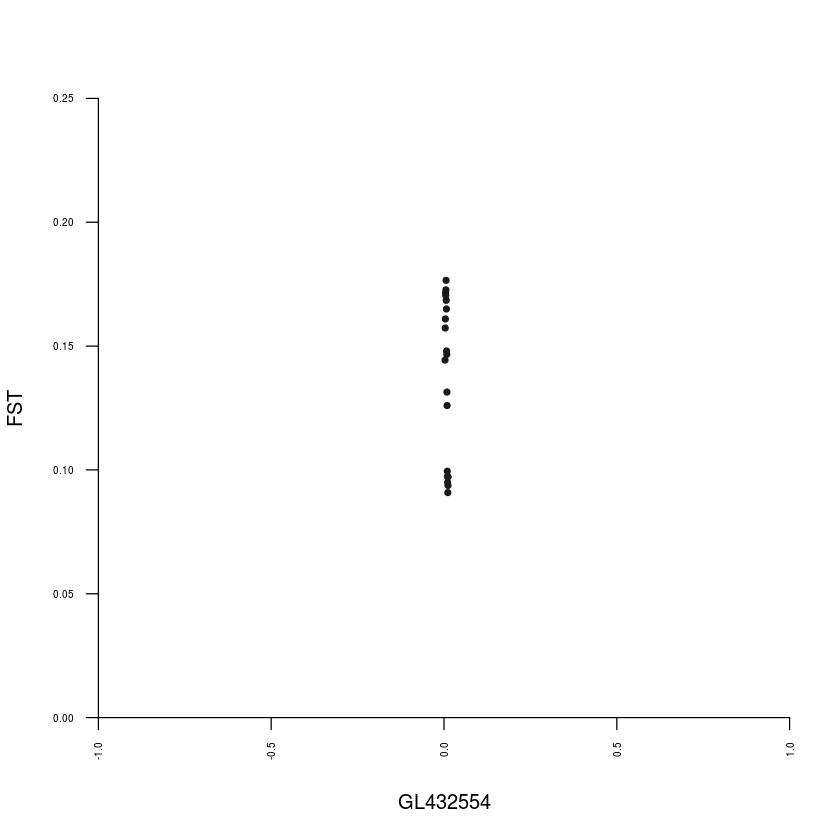

In [48]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==15), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[15])

Warning message in manhattan(subset(fstHighScaf, ScaffoldNum2 == 16), chr = "ScaffoldNum2", :
“No SNP column found. OK unless you're trying to highlight.”

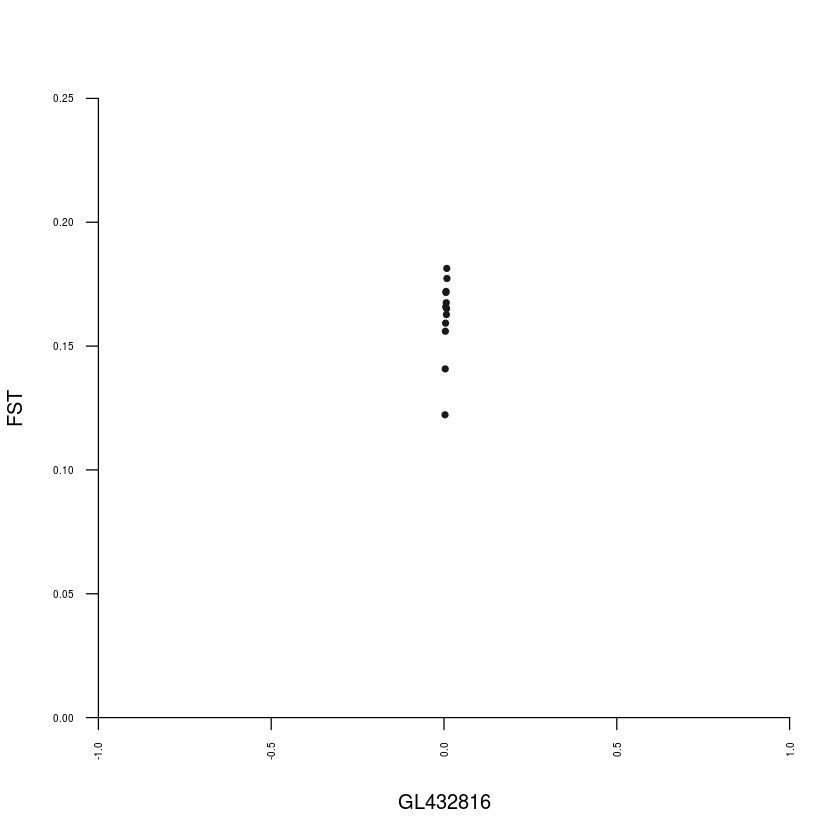

In [50]:
plot=manhattan(subset(fstHighScaf, ScaffoldNum2==16), chr = "ScaffoldNum2", bp = "midPos", p = "FST",  
col = c("gray10", "gray60"), logp=FALSE, las=2, cex.axis=0.5, ylim=c(0, 0.25), ylab="FST", xlab=HighScaf[16])

In [ ]:
plot=ggplot(data=fstHigh, aes(x=midPos, y=FST))+
  geom_point(data=fstHigh)+
  theme_bw()+ facet_grid(.~ScaffoldNum)

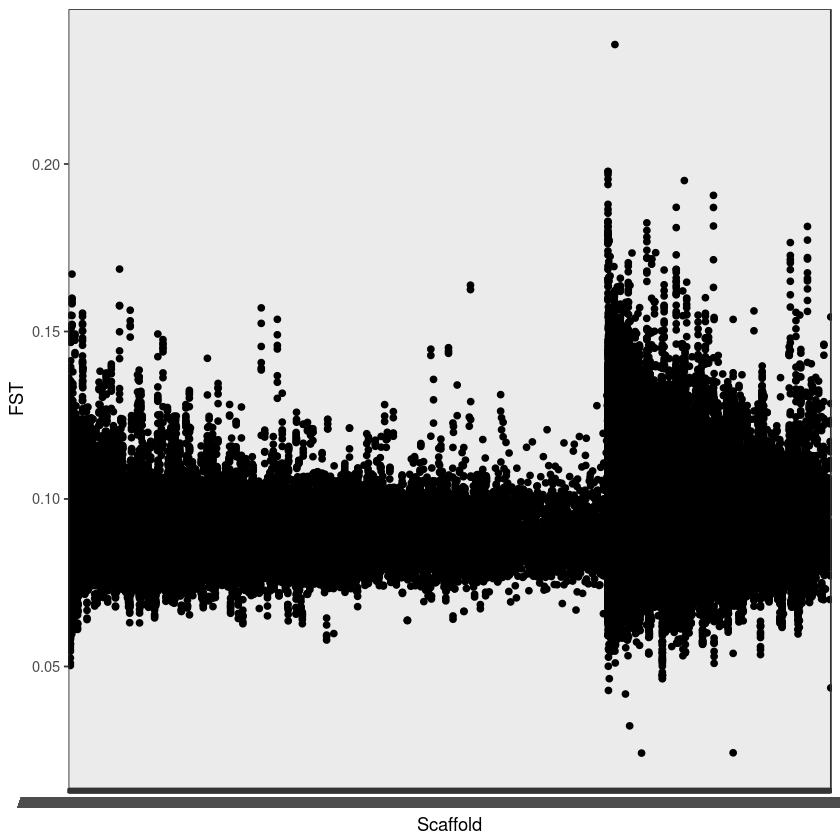

In [16]:
##plot of fst by scaffold